### SVM——e1071

参考[Support Vector Machines in R](https://www.datacamp.com/community/tutorials/support-vector-machines-r)

In [1]:
library(e1071)

#### Linear SVM Classifier

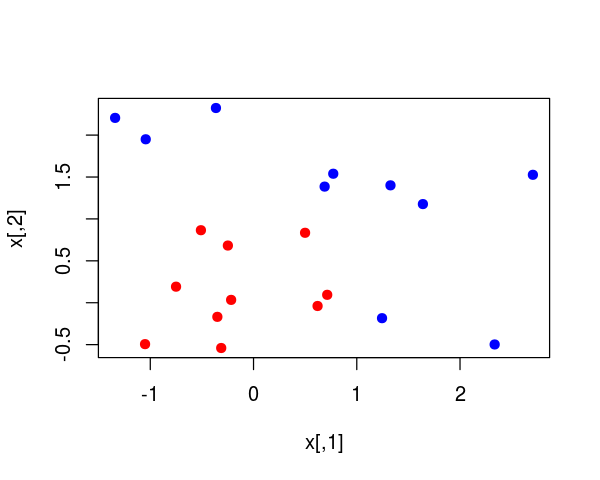

In [4]:
# 测试数据集
set.seed(10111)
x = matrix(rnorm(40), 20, 2)
y = rep(c(-1, 1), c(10, 10))
x[y == 1,] = x[y == 1,] + 1
options(repr.plot.width=5, repr.plot.height=4)  # plot size
plot(x, col = y + 3, pch = 19)

In [5]:
# 训练
dat = data.frame(x, y = as.factor(y))
svmfit = svm(y ~ ., data = dat, kernel = "linear", cost = 10, scale = FALSE)
svmfit


Call:
svm(formula = y ~ ., data = dat, kernel = "linear", cost = 10, scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  10 

Number of Support Vectors:  6


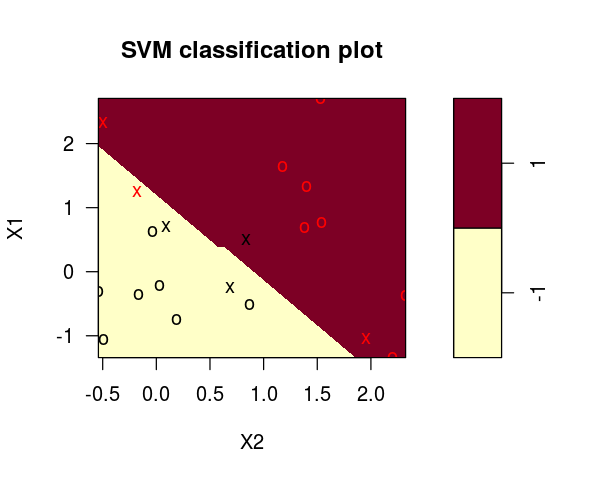

In [6]:
plot(svmfit, dat)

In [8]:
# 进一步地进行可视化
make.grid = function(x, n = 75) {
  grange = apply(x, 2, range)
  x1 = seq(from = grange[1,1], to = grange[2,1], length = n)
  x2 = seq(from = grange[1,2], to = grange[2,2], length = n)
  expand.grid(X1 = x1, X2 = x2)
}
xgrid = make.grid(x)
ygrid = predict(svmfit, xgrid)
head(xgrid)

X1,X2
<dbl>,<dbl>
-1.340638,-0.5400074
-1.285957,-0.5400074
-1.231277,-0.5400074
-1.176596,-0.5400074
-1.121915,-0.5400074
-1.067235,-0.5400074


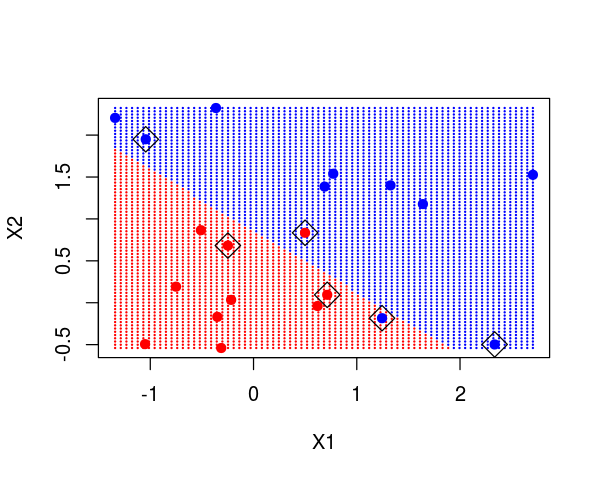

In [9]:
plot(xgrid, col = c("red","blue")[as.numeric(ygrid)], pch = 20, cex = .2)
points(x, col = y + 3, pch = 19)
points(x[svmfit$index,], pch = 5, cex = 2)

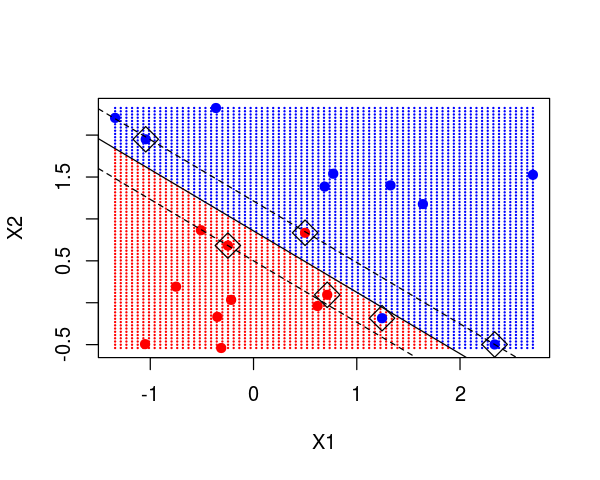

In [10]:
# 决策边界可视化
beta = drop(t(svmfit$coefs)%*%x[svmfit$index,])
beta0 = svmfit$rho

plot(xgrid, col = c("red", "blue")[as.numeric(ygrid)], pch = 20, cex = .2)
points(x, col = y + 3, pch = 19)
points(x[svmfit$index,], pch = 5, cex = 2)
abline(beta0 / beta[2], -beta[1] / beta[2])
abline((beta0 - 1) / beta[2], -beta[1] / beta[2], lty = 2)
abline((beta0 + 1) / beta[2], -beta[1] / beta[2], lty = 2)

#### Non-Linear SVM Classifier

In [13]:
load(file = "./data/ESL.mixture.rda")
names(ESL.mixture)

[1] "x"        "y"        "xnew"     "prob"     "marginal" "px1"      "px2"     
[8] "means"

In [14]:
rm(x, y)
attach(ESL.mixture)

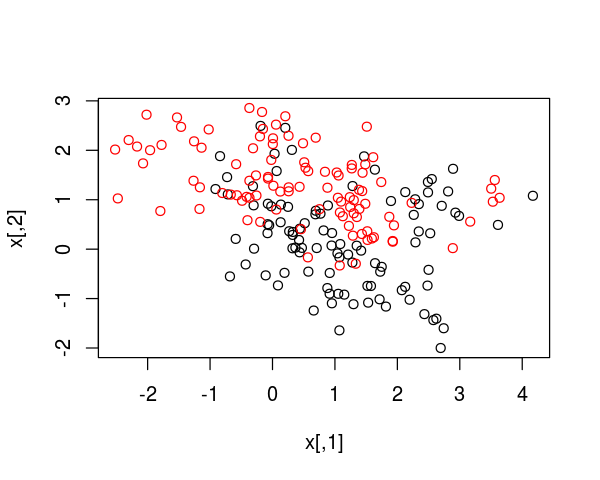

In [15]:
plot(x, col = y + 1)

In [16]:
dat = data.frame(y = factor(y), x)
fit = svm(factor(y) ~ ., data = dat, scale = FALSE, kernel = "radial", cost = 5)

In [17]:
xgrid = expand.grid(X1 = px1, X2 = px2)
ygrid = predict(fit, xgrid)

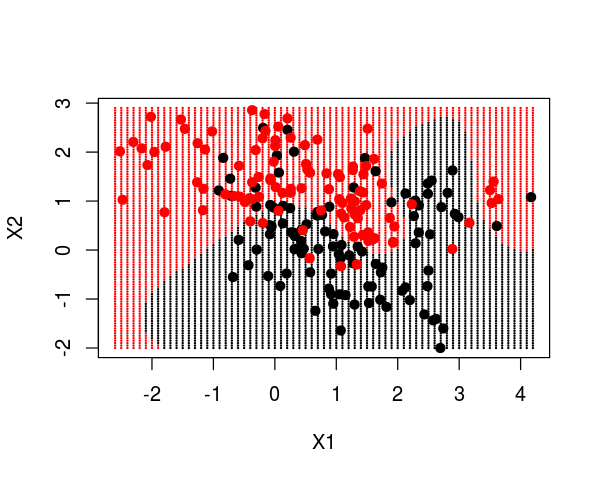

In [18]:
plot(xgrid, col = as.numeric(ygrid), pch = 20, cex = .2)
points(x, col = y + 1, pch = 19)

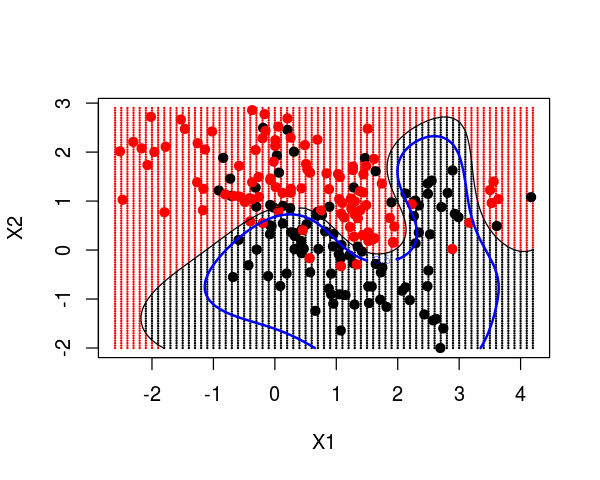

In [19]:
# 决策边界
func = predict(fit, xgrid, decision.values = TRUE)
func = attributes(func)$decision

xgrid = expand.grid(X1 = px1, X2 = px2)
ygrid = predict(fit, xgrid)
plot(xgrid, col = as.numeric(ygrid), pch = 20, cex = .2)
points(x, col = y + 1, pch = 19)

contour(px1, px2, matrix(func, 69, 99), level = 0, add = TRUE)
contour(px1, px2, matrix(func, 69, 99), level = 0.5, add = TRUE, col = "blue", lwd = 2)